In [56]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.ops import cascaded_union
import matplotlib.pyplot as plt

In [2]:
gdf = gpd.read_file('sig.shp', encoding='CP949')
df = pd.read_csv('_essential15.csv', sep=',', header=0, encoding='CP949')
df.head()

,code,geo,pop,emp_res,emp
0,11110,종로구,154986,72265,295339
1,11140,중구,125733,59861,367256
2,11170,용산구,233342,106678,158693
3,11200,성동구,297003,144719,162332
4,11215,광진구,360369,181481,143502


In [3]:
gdf_sorted = gdf.sort_values(by='SIG_CD')

# rhovec = df.emp/gdf_sorted.area
# index = gdf_sorted.SIG_CD.to_numpy().astype(int)
# rhovec.index = index
gdf_sorted['rho'] = 1e+6 * df.emp/gdf_sorted.area
gdf_sorted['rho_log'] = 6 + np.log10(df.emp/gdf_sorted.area)
gdf_sorted.head()

,SIG_CD,SIG_KOR_NM,geometry,rho,rho_log
159,11110,종로구,"POLYGON ((956615.453 1953567.199, 956621.579 1...",4014.206502,3.603600
154,11140,중구,"POLYGON ((957890.386 1952616.746, 957909.908 1...",5297.623945,3.724081
144,11170,용산구,"POLYGON ((953115.761 1950834.084, 953114.206 1...",1243.471938,3.094636
142,11200,성동구,"POLYGON ((959681.109 1952649.605, 959842.412 1...",3680.126854,3.565863
153,11215,광진구,"POLYGON ((964825.082 1952633.250, 964875.590 1...",3432.276632,3.535582


In [22]:
code_comp = np.array(['11', '28', '41'])

temp = gdf_sorted['SIG_CD'].to_numpy()
index_result = []
for index, code in enumerate(temp):
    if code[:2] in code_comp:
        index_result.append(index)

gdf_plot = gdf_sorted.iloc[index_result]

# Ong-Jin 28720	
gdf_plot = gdf_plot[gdf_plot['SIG_CD'] != '28720']

79
78


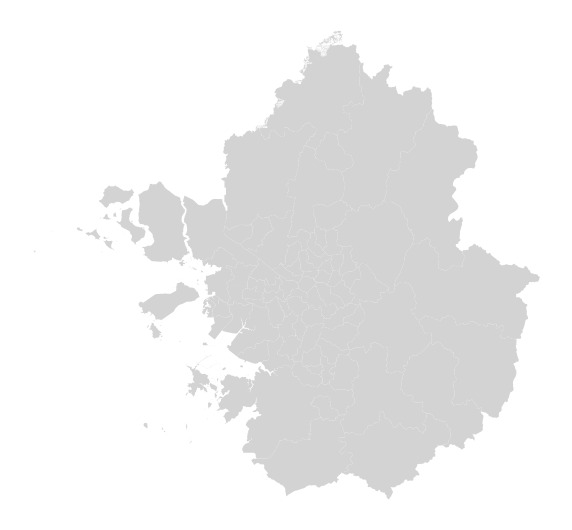

In [106]:
fig, ax  = plt.subplots(figsize=(10,10))
ax.set_axis_off()

gdf_plot.plot(fc='lightgray', ax=ax)
plt.show()

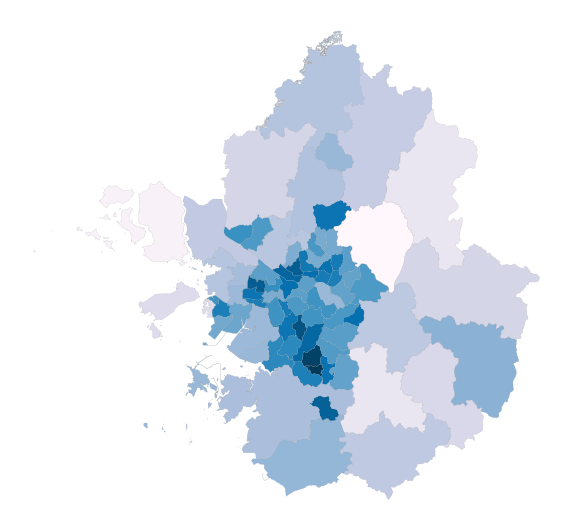

In [57]:
fig2, ax2  = plt.subplots(figsize=(10,10))
ax2.set_axis_off()

gdf_plot.plot(column='rho_log', ax=ax2, cmap='PuBu', edgecolor='gray', linewidth=0.1, legend=False)

plt.show()

In [98]:
#=============
code_comp1 = np.array(['11'])
code_comp2 = np.array(['28', '41'])

temp = gdf_sorted['SIG_CD'].to_numpy()
index_result1, index_result2 = [], []
for index, code in enumerate(temp):
    if code[:2] in code_comp1:
        index_result1.append(index)
    elif code[:2] in code_comp2:
        index_result2.append(index)

gdf_seoul = gdf_sorted.iloc[index_result1]
gdf_seoul = gpd.GeoSeries(cascaded_union(gdf_seoul['geometry']))

gdf_notseoul = gdf_sorted.iloc[index_result2]
gdf_notseoul = gdf_notseoul[gdf_notseoul['SIG_CD'] != '28720']
#=============

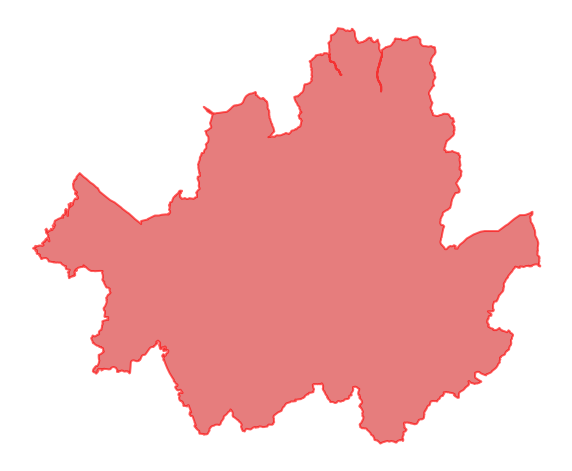

In [105]:
fig3, ax3  = plt.subplots(figsize=(10,10))
ax3.set_axis_off()

gdf_seoul.exterior.plot(ax=ax3, fc='tab:red', alpha=0.6, ec='red', linewidth=2)
# gdf_plot.plot(column='rho_log', ax=ax3, cmap='PuBu', edgecolor='gray', linewidth=0.1, legend=False)


plt.show()